# Introduction to Neural Networks

Based off of the lab exercises from deeplearning.ai, using public datasets and personal flair.

## Objectives
- Build the general architecture of a learning algorithm, including:
    - initializing parameters
    - calculating the cost function and its gradient
    - using an optimization algorithm
- Gather all three functions above into a main model function, in the right order.

## Import Packages

In [1]:
import os
import random
import re
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy

from PIL import Image
from sklearn.model_selection import train_test_split
from scipy import ndimage

%matplotlib inline

## Dataset

Data will be taken from Kaggle's [Dogs vs. Cats](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data) dataset.

From Kaggle's description:

>The train folder contains 25,000 images of dogs and cats. Each image in this folder has the label as part of the filename. The test folder contains 12,500 images, named according to a numeric id. For each image in the test set, you should predict a probability that the image is a dog (1 = dog, 0 = cat).

Steps to reproduce:
- preprocess train and validation set
    - (optional) select subset of training set
    - resize images to all be the same (64x64)
    - flatten images
- build logistic regression model as a single-layer neural network
    - initialize weight matrix
    - write forward and backprop functions, defining the log loss cost function
    - optimize learning

In [2]:
TRAIN_PATH = 'C:/Users/JYDIW/Documents/kaggle-datasets/dogs-vs-cats-redux-kernels-edition/train/'
TEST_PATH = 'C:/Users/JYDIW/Documents/kaggle-datasets/dogs-vs-cats-redux-kernels-edition/test/'

ROWS = 64
COLS = 64
CHANNELS = 3

m_train = 2500
m_val = 500
m_total = m_train + m_val

all_train_dogs = [TRAIN_PATH+f for f in os.listdir(TRAIN_PATH) if 'dog' in f]
all_train_cats = [TRAIN_PATH+f for f in os.listdir(TRAIN_PATH) if 'cat' in f]

all_train_images = random.sample(all_train_dogs, m_total//2) + random.sample(all_train_cats, m_total//2)
random.shuffle(all_train_images)

train_images, val_images = train_test_split(all_train_images, test_size=m_val)

# all_test_images = [TEST_PATH+f for f in os.listdir(TEST_PATH)]
# test_images = random.sample(all_test_images, m_test)

In [3]:
def read_image(image_path, as_array=False):
  img = Image.open(image_path)
  if as_array:
    return np.asarray(img.resize((COLS, ROWS)))
  return img.resize((COLS, ROWS))

def resize_images(images):
  count = len(images)
  data = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.uint8)
  for i, file in enumerate(images):
    img = read_image(file, as_array=True)
    data[i] = img
    if (i+1)%250 == 0:
      print(f'Processed {i+1} of {count}')
  return data

(64, 64, 3)


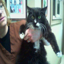

In [4]:
print(read_image(train_images[0], as_array=True).shape)
read_image(train_images[0])

In [5]:
train_images_resized = resize_images(train_images)
val_images_resized = resize_images(val_images)

Processed 250 of 2500
Processed 500 of 2500
Processed 750 of 2500
Processed 1000 of 2500
Processed 1250 of 2500
Processed 1500 of 2500
Processed 1750 of 2500
Processed 2000 of 2500
Processed 2250 of 2500
Processed 2500 of 2500
Processed 250 of 500
Processed 500 of 500


In [6]:
def generate_labels(images):
  labels =np.ndarra((1, images.shape[0]), dtype=np.uint8]
  for i in images:
    if re.findall('.+\/(\w+)\.\d+\.jpg', i)[0] == 'dog':
      la[0][i] = ed(1)
    else:
labels[0][i] = 0end(0)
  return np.array(labels)

SyntaxError: invalid syntax (<ipython-input-6-7726e0b8ac20>, line 2)

In [10]:
y_train = generate_labels(train_images)
y_val = generate_labels(val_images)

In [11]:
def flatten_and_normalize_images(images):
  return images.reshape(images.shape[0], -1).T / 255

In [12]:
)

(12288, 2500)

(2500,)

In [23]:
y_train.reshape((1, y_train.shape[0]))

array([[0, 0, 0, ..., 1, 0, 0]])

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

cost after iteration 0: 0.6931471805599454


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


cost after iteration 100: nan
cost after iteration 200: nan
cost after iteration 300: nan
cost after iteration 400: nan
cost after iteration 500: nan
cost after iteration 600: nan
cost after iteration 700: nan
cost after iteration 800: nan
cost after iteration 900: nan


KeyboardInterrupt: 

In [ ]:
class CatDog():
  
  def __init__(self, m_train=2500, m_test=250, val_ratio=0.2):

    def random_train_subset(*pools, m_train=None):
      # sample from train if m_train is specified. otherwise, use all images
      train_images = []
      for pool in pools:
        if m_train // 2 < len(pool):
          train_images.append(random.sample(pool, m_train//2))
        else:
          train_images.append(pool)
      random.shuffle(train_images)
      return train_images

    def generate_labels(images):
      labels = []
      for i in images:
        if re.findall('.+\/(\w+)\.\d+\.jpg', i)[0] == 'dog':
          labels.append(1)
        else:
          labels.append(0)
      return np.array(labels)
    
    # specify paths
    TRAIN_PATH = 'C:/Users/JYDIW/Documents/kaggle-datasets/dogs-vs-cats-redux-kernels-edition/train/'
    TEST_PATH = 'C:/Users/JYDIW/Documents/kaggle-datasets/dogs-vs-cats-redux-kernels-edition/test/'

    # get all dogs and cats from train path
    self.all_train_dogs = [TRAIN_PATH+f for f in os.listdir(TRAIN_PATH) if 'dog' in f]
    self.all_train_cats = [TRAIN_PATH+f for f in os.listdir(TRAIN_PATH) if 'cat' in f]
    self.all_train_images = random_train_subset(
      self.all_train_dogs, self.all_train_cats, m_train=m_train)

    # generate labels
    self.all_train_images_labels = generate_labels(self.all_train_images)

  def resize_images(self, images, img_rows=64, img_cols=64, verbose=True):

    def resize(image_path, as_array=False):
      img = Image.open(image_path).resize((self.COLS, self.ROWS))
      if as_array:
        return np.asarray(img)
      return img

    self.ROWS = img_rows
    self.COLS = img_cols
    self.CHANNELS = resize(all_train_images[0], as_array=True).shape[-1]
    all_train_images = resize_all(all_train_images, verbose)

    count = len(images)
    data = np.ndarray((count, self.COLS, self.ROWS, self.CHANNELS), dtype=np.uint8)
    for i, file in enumerate(images):
      data[i] = resize(file, as_array=True)
      if (i+1)%250 == 0 and verbose:
        print(f'Processed {i+1} of {count}')
    return data
    
    
    
    self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
      all_train_images, all_train_images_labels, test_size=val_ratio, random_state=1, stratify=all_train_images_labels)
    
    self.m_train = self.X_train.shape[0]
    self.m_val = self.X_val.shape[0]


# class CatDogImage():

#   def 
    
    